In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/myData.tVaccMi.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.head()

,Date,FIPS,Completeness_pct,SVI_CTGY,Census2019,tVaccMi
0,2022-05-14,55089.0,96.8,A,89221.0,395.621321
1,2022-05-14,1035.0,92.5,D,12067.0,491.592597
2,2022-05-14,5097.0,90.5,C,8986.0,602.040641
3,2022-05-14,5107.0,90.5,D,17782.0,468.753088
4,2022-05-14,6001.0,97.6,B,1671329.0,1957.946030


In [7]:
df.shape

(3284, 6)

In [8]:
df.sample(5)

,Date,FIPS,Completeness_pct,SVI_CTGY,Census2019,tVaccMi
2098,2022-05-14,22043.0,96.9,C,22389.0,666.356429
1852,2022-05-14,20103.0,93.6,A,81758.0,550.789632
632,2022-05-14,39081.0,98.5,C,65325.0,385.899141
3004,2022-05-14,39111.0,98.5,B,13654.0,366.412408
1274,2022-05-14,27141.0,94.6,A,97238.0,660.765316


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284 entries, 0 to 3283
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3284 non-null   object 
 1   FIPS              3213 non-null   float64
 2   Completeness_pct  3261 non-null   float64
 3   SVI_CTGY          3219 non-null   object 
 4   Census2019        3221 non-null   float64
 5   tVaccMi           3209 non-null   float64
dtypes: float64(4), object(2)
memory usage: 154.1+ KB


In [10]:
df.describe()

,FIPS,Completeness_pct,Census2019,tVaccMi
count,3213.000000,3261.000000,3.221000e+03,3209.000000
mean,31484.932773,94.858356,1.029499e+05,729.484780
std,16293.011680,4.600959,3.295575e+05,494.429960
min,1001.000000,73.500000,8.600000e+01,172.556602
25%,19045.000000,93.600000,1.113100e+04,403.148128
50%,30033.000000,96.800000,2.610800e+04,580.858183
75%,46115.000000,97.800000,6.721500e+04,877.705442
max,78030.000000,98.900000,1.003911e+07,4433.418574


In [11]:
df.isnull().sum()

Date                 0
FIPS                71
Completeness_pct    23
SVI_CTGY            65
Census2019          63
tVaccMi             75
dtype: int64

In [12]:
df.dropna(inplace=True) # remove the null values

In [13]:
df.isnull().sum()

Date                0
FIPS                0
Completeness_pct    0
SVI_CTGY            0
Census2019          0
tVaccMi             0
dtype: int64

In [14]:
df.corr()

,FIPS,Completeness_pct,Census2019,tVaccMi
FIPS,1.000000,-0.016414,-0.064242,0.142313
Completeness_pct,-0.016414,1.000000,0.071174,0.204122
Census2019,-0.064242,0.071174,1.000000,0.086890
tVaccMi,0.142313,0.204122,0.086890,1.000000


In [15]:
df['SVI_CTGY'].value_counts()

D    800
A    798
B    798
C    797
Name: SVI_CTGY, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


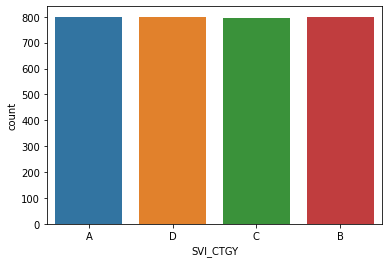

In [16]:
sns.countplot(df['SVI_CTGY'])

In [17]:
df['Completeness_pct'].value_counts()

98.9    254
97.8    175
97.6    164
96.9    164
89.4    159
94.0    141
79.0    133
91.3    115
98.3    110
93.6    105
97.4     99
90.7     93
98.6     92
98.5     88
94.6     87
97.1     86
95.1     83
98.1     82
93.8     77
97.3     76
90.5     75
96.8     72
94.8     67
92.5     67
98.7     67
96.7     65
95.8     56
97.2     55
92.7     53
93.1     46
96.0     39
97.0     32
98.2     24
96.2     19
95.0     18
97.7     15
73.5     14
89.9     11
94.1     10
89.0      5
Name: Completeness_pct, dtype: int64

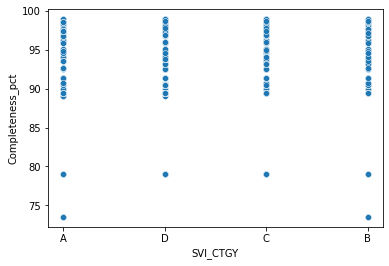

In [18]:
sns.scatterplot(x='SVI_CTGY',y='Completeness_pct',data=df)

In [19]:
df.pop('Date')

0       2022-05-14
1       2022-05-14
2       2022-05-14
3       2022-05-14
4       2022-05-14
           ...    
3278    2022-05-14
3279    2022-05-14
3280    2022-05-14
3281    2022-05-14
3282    2022-05-14
Name: Date, Length: 3193, dtype: object

In [20]:
df['Census2019']=df['Census2019'].astype('int64')

In [21]:
df['tVaccMi']=df['tVaccMi'].astype('int64')

In [22]:
df['FIPS']=df['FIPS'].astype('int64')

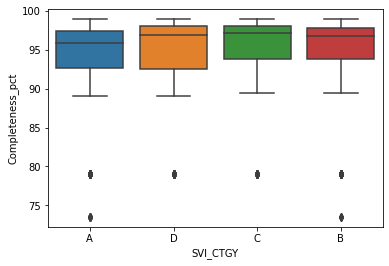

In [23]:
sns.boxplot(x='SVI_CTGY',y='Completeness_pct',data=df)

In [24]:
df['tVaccMi']

0        395
1        491
2        602
3        468
4       1957
        ... 
3278     464
3279     346
3280     446
3281     578
3282     484
Name: tVaccMi, Length: 3193, dtype: int64

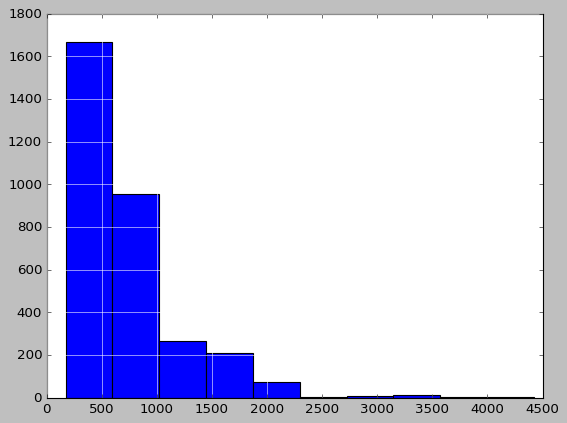

In [63]:
plt.hist(df['tVaccMi'])
plt.style.use('classic')
plt.grid(color='w', linestyle='solid')


In [26]:
df['Census2019'].max()

10039107

In [27]:
df['Census2019'].min()

169

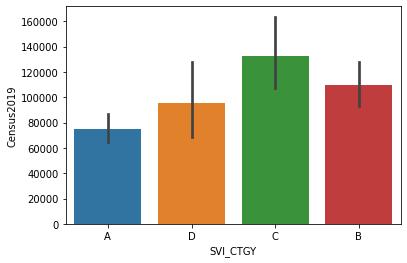

In [28]:
sns.barplot(x='SVI_CTGY',y='Census2019',data=df)

In [29]:
# optimization

In [30]:
df.columns

Index(['FIPS', 'Completeness_pct', 'SVI_CTGY', 'Census2019', 'tVaccMi'], dtype='object')

In [31]:
# get the data of population which are not vaccinated
df['Incomplete_pop'] = (100 - df['Completeness_pct'])*df['Census2019']//100

In [32]:
df.head()

,FIPS,Completeness_pct,SVI_CTGY,Census2019,tVaccMi,Incomplete_pop
0,55089,96.8,A,89221,395,2855.0
1,1035,92.5,D,12067,491,905.0
2,5097,90.5,C,8986,602,853.0
3,5107,90.5,D,17782,468,1689.0
4,6001,97.6,B,1671329,1957,40111.0


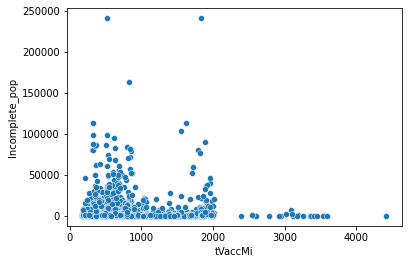

In [33]:
sns.scatterplot(x='tVaccMi',y='Incomplete_pop',data=df)

In [34]:
# get the 30 unique county
df_new = df[ df['FIPS'].isin(df['FIPS'].unique()[:30])]
dic = {'A':4, 'B':3, 'C':2, 'D':1}
df_new['SVI_new'] = df_new['SVI_CTGY'].replace(dic)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,FIPS,Completeness_pct,SVI_CTGY,Census2019,tVaccMi,Incomplete_pop,SVI_new
0,55089,96.8,A,89221,395,2855.0,4
1,1035,92.5,D,12067,491,905.0,1
2,5097,90.5,C,8986,602,853.0,2
3,5107,90.5,D,17782,468,1689.0,1
4,6001,97.6,B,1671329,1957,40111.0,3


In [35]:
df_new['FIPS'].unique

<bound method Series.unique of 0     55089
1      1035
2      5097
3      5107
4      6001
5      6055
6      8015
7     12087
8     13031
9     13309
10    19049
11    19143
12    17011
13    18159
14    21001
15    21051
16    21125
17    21161
18    21187
19    21195
20    22123
21    23021
22    26069
23    26127
24    27059
25    27095
26    29005
27    29021
28    28163
29    30057
Name: FIPS, dtype: int64>

In [36]:
def fun(vec, data=df_new): # vec -vector of length 30(number of county selected)
  popIncomplete = sum(vec*data['Incomplete_pop']) # sum because we need one single value instead of 30 different value
  tVaccMi = sum(vec*data['tVaccMi'])
  svi = sum(vec*data['SVI_new'])
  return -1*((popIncomplete*svi)/tVaccMi) # optimization function


In [37]:
from scipy.optimize import minimize
import numpy as np
import random

bnd = ((0., 0.3) for i in range(30)) # fix the maximum and minimum value

def con(vec):   # sum of all the weights should be 1 constraints # tolrernce how much accuracy(percesion)
  return sum(vec)-1

cons = [{'type': 'eq', 'fun':con}] # define constraints

result = minimize(fun, x0 = np.random.rand(30)/10., bounds = bnd, constraints=cons, method='trust-constr',hessp=0, tol=1e-5, options={'maxiter':1000})

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


In [38]:
sum(result['x'])

0.9999999999999998

In [39]:
result['x']

array([2.99580976e-01, 8.56384607e-05, 1.00777835e-04, 9.47569347e-05,
       2.99910574e-01, 3.53107947e-05, 8.90113038e-05, 9.20026455e-05,
       2.44841773e-04, 8.91325738e-05, 9.60429245e-02, 1.32011820e-04,
       3.48961308e-04, 2.99968982e-01, 3.20171432e-04, 1.29003675e-04,
       1.98223447e-04, 2.15565805e-04, 2.18452179e-04, 1.50307741e-04,
       1.01679886e-04, 7.93334546e-05, 2.68055350e-04, 1.00111338e-04,
       3.97375235e-04, 9.42947941e-05, 3.50401142e-04, 4.16891752e-04,
       8.05453826e-05, 6.36850296e-05])

In [40]:
for i in range(30):  # print the result with county
  print(df_new['FIPS'][i], result['x'][i])

55089 0.2995809759259093
1035 8.563846067757086e-05
5097 0.00010077783534918524
5107 9.475693469055682e-05
6001 0.2999105740545047
6055 3.531079470688109e-05
8015 8.901130378305541e-05
12087 9.200264546706562e-05
13031 0.00024484177302039215
13309 8.913257376385111e-05
19049 0.09604292446678271
19143 0.0001320118199061596
17011 0.00034896130849629097
18159 0.299968982460324
21001 0.00032017143183138343
21051 0.00012900367535236072
21125 0.000198223447195439
21161 0.00021556580474464584
21187 0.00021845217887054536
21195 0.0001503077408422705
22123 0.0001016798857652465
23021 7.933345456347958e-05
26069 0.0002680553502448583
26127 0.000100111338291381
27059 0.00039737523531727814
27095 9.42947941179797e-05
29005 0.00035040114159710077
29021 0.0004168917516670838
28163 8.054538260785104e-05
30057 6.368502960923551e-05


In [41]:
ls_new = [(val, county) for val, county in zip(result['x'], df_new['FIPS'])] # sort out the result
ls_new = sorted(ls_new, reverse=True)
ls_new

[(0.299968982460324, 18159),
 (0.2999105740545047, 6001),
 (0.2995809759259093, 55089),
 (0.09604292446678271, 19049),
 (0.0004168917516670838, 29021),
 (0.00039737523531727814, 27059),
 (0.00035040114159710077, 29005),
 (0.00034896130849629097, 17011),
 (0.00032017143183138343, 21001),
 (0.0002680553502448583, 26069),
 (0.00024484177302039215, 13031),
 (0.00021845217887054536, 21187),
 (0.00021556580474464584, 21161),
 (0.000198223447195439, 21125),
 (0.0001503077408422705, 21195),
 (0.0001320118199061596, 19143),
 (0.00012900367535236072, 21051),
 (0.0001016798857652465, 22123),
 (0.00010077783534918524, 5097),
 (0.000100111338291381, 26127),
 (9.475693469055682e-05, 5107),
 (9.42947941179797e-05, 27095),
 (9.200264546706562e-05, 12087),
 (8.913257376385111e-05, 13309),
 (8.901130378305541e-05, 8015),
 (8.563846067757086e-05, 1035),
 (8.054538260785104e-05, 28163),
 (7.933345456347958e-05, 23021),
 (6.368502960923551e-05, 30057),
 (3.531079470688109e-05, 6055)]

In [42]:
df_new['val'] = df_new['Incomplete_pop']*df_new['SVI_new']/df_new['tVaccMi']

df_new.head(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,FIPS,Completeness_pct,SVI_CTGY,Census2019,tVaccMi,Incomplete_pop,SVI_new,val
0,55089,96.8,A,89221,395,2855.0,4,28.911392
1,1035,92.5,D,12067,491,905.0,1,1.843177
2,5097,90.5,C,8986,602,853.0,2,2.833887
3,5107,90.5,D,17782,468,1689.0,1,3.608974
4,6001,97.6,B,1671329,1957,40111.0,3,61.488503
5,6055,97.6,C,137744,1962,3305.0,2,3.369011
6,8015,97.1,A,20356,1127,590.0,4,2.094055
7,12087,98.7,B,74228,899,964.0,3,3.216908
8,13031,89.4,D,79608,474,8438.0,1,17.801688
9,13309,89.4,D,7855,458,832.0,1,1.816594


In [43]:
# get the 300 unique county
df_new = df[ df['FIPS'].isin(df['FIPS'].unique()[:300])]
dic = {'A':4, 'B':3, 'C':2, 'D':1}
df_new['SVI_new'] = df_new['SVI_CTGY'].replace(dic)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,FIPS,Completeness_pct,SVI_CTGY,Census2019,tVaccMi,Incomplete_pop,SVI_new
0,55089,96.8,A,89221,395,2855.0,4
1,1035,92.5,D,12067,491,905.0,1
2,5097,90.5,C,8986,602,853.0,2
3,5107,90.5,D,17782,468,1689.0,1
4,6001,97.6,B,1671329,1957,40111.0,3


In [44]:
df_new['FIPS'].nunique()

300

In [45]:
def fun(vec, data=df_new): # vec -vector of length 300(number of county selected)
  popIncomplete = sum(vec*data['Incomplete_pop']) # sum because we need one single value instead of 300 different value
  tVaccMi = sum(vec*data['tVaccMi'])
  svi = sum(vec*data['SVI_new'])
  return -1*((popIncomplete*svi)/tVaccMi) # optimization function


In [46]:
from scipy.optimize import minimize
import numpy as np
import random

n = df_new['FIPS'].nunique()
bnd = ((0., 0.3) for i in range(n)) # fix the maximum and minimum value

def con(vec):   # sum of all the weights should be 1 constraints # tolrernce how much accuracy(percesion)
  return sum(vec)-1

cons = [{'type': 'eq', 'fun':con}] # define constraints

result = minimize(fun,x0 = np.random.rand(n)/10., bounds = bnd, constraints=cons, method='trust-constr',hessp=0,tol=1e-10, options={'maxiter':10})

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


In [47]:
sum(result['x']), result['x']


(1.4679455483563046,
 array([ 5.15994705e-02, -2.60539769e-02, -2.65294527e-02, -5.07143271e-02,
         9.55205036e-02, -1.21817704e-02,  2.40337608e-02, -2.36554605e-02,
        -1.78709050e-03,  4.05069706e-03,  2.14396400e-02, -2.33192868e-02,
         4.25991988e-02,  6.60900500e-02, -3.32889908e-03, -2.67464847e-02,
        -5.33504772e-02, -4.42359890e-02, -3.43337524e-03, -3.02090756e-02,
         1.52791251e-02,  2.26613400e-02, -5.08772023e-03, -6.92904651e-03,
         6.24733291e-02, -1.55125076e-02,  1.61364654e-02,  5.13359538e-02,
         2.55690799e-03,  3.23245069e-02, -2.03670672e-02, -4.24519271e-02,
        -4.15416344e-02, -3.25189955e-02,  4.52959706e-02,  1.86141719e-02,
        -5.53624997e-04, -4.16113027e-03,  1.24102858e-01,  2.19628459e-02,
        -1.37216903e-02, -5.27343017e-03, -2.03428097e-02,  7.74989163e-03,
         2.22379712e-02, -1.29852130e-02, -2.76608092e-02,  4.89789555e-02,
        -4.63299518e-02, -6.30879755e-02, -3.36099037e-02,  1.50738

In [48]:
result['x'].min()

-0.1012402558708147

In [49]:
ls_new = [(val, county) for val, county in zip(result['x'], df_new['FIPS'])] # sort out the result
ls_new = sorted(ls_new, reverse=True)

In [50]:
ls_new

[(0.2265167776454963, 32003),
 (0.2008352278390878, 51041),
 (0.18047995427606958, 53033),
 (0.1477250300218668, 51087),
 (0.12434978889121404, 42101),
 (0.12410285818338951, 34029),
 (0.12197838981037161, 34017),
 (0.11353815030500841, 26081),
 (0.10561563799745766, 13223),
 (0.09552050364334258, 6001),
 (0.08920851021055808, 13057),
 (0.08128984790319892, 45063),
 (0.06990399498513664, 55055),
 (0.06609004997199124, 18159),
 (0.06507692238962333, 26115),
 (0.0648362078043082, 51770),
 (0.06247332912393511, 27059),
 (0.06221062136641625, 51145),
 (0.059274200081028024, 21167),
 (0.05904839613894917, 30111),
 (0.05787962865880037, 13117),
 (0.05714141789964629, 39153),
 (0.05609796750037022, 21091),
 (0.05513900646726532, 13145),
 (0.05483333072288252, 36071),
 (0.05376894027827717, 1009),
 (0.053750470137900304, 20177),
 (0.05362698002303436, 37119),
 (0.05260172656100942, 39083),
 (0.05159947050868069, 55089),
 (0.05133595376369873, 29021),
 (0.050677035674983335, 17185),
 (0.0489789

In [51]:
df_new[ df_new['FIPS'].isin([ls_new[i][1] for i in range(5)])]

,FIPS,Completeness_pct,SVI_CTGY,Census2019,tVaccMi,Incomplete_pop,SVI_new
139,32003,95.0,C,2266715,1622,113335.0,2
144,42101,94.8,D,1584064,628,82371.0,1
192,51041,79.0,A,352802,532,74088.0,4
268,51087,79.0,B,330818,545,69471.0,3
272,53033,96.0,B,2252782,1884,90111.0,3


In [52]:
[ls_new[i][1] for i in range(5)]

[32003, 51041, 53033, 51087, 42101]

In [53]:
df_new = df[ df['FIPS'].isin(df['FIPS'].unique()[:3000])]
dic = {'A':4, 'B':3, 'C':2, 'D':1}
df_new['SVI_new'] = df_new['SVI_CTGY'].replace(dic)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,FIPS,Completeness_pct,SVI_CTGY,Census2019,tVaccMi,Incomplete_pop,SVI_new
0,55089,96.8,A,89221,395,2855.0,4
1,1035,92.5,D,12067,491,905.0,1
2,5097,90.5,C,8986,602,853.0,2
3,5107,90.5,D,17782,468,1689.0,1
4,6001,97.6,B,1671329,1957,40111.0,3


In [54]:
def fun(vec, data=df_new): # vec -vector of length 3000(number of county selected)
  popIncomplete = sum(vec*data['Incomplete_pop']) # sum because we need one single value instead of 300 different value
  tVaccMi = sum(vec*data['tVaccMi'])
  svi = sum(vec*data['SVI_new'])
  return -1*((popIncomplete*svi)/tVaccMi)

In [64]:
from scipy.optimize import minimize
import numpy as np
import random

n = df_new['FIPS'].nunique()
bnd = ((0., 0.3) for i in range(n)) # fix the maximum and minimum value

def con(vec):   # sum of all the weights should be 1 constraints # tolrernce how much accuracy(percesion)
  return sum(vec)-1

cons = [{'type': 'eq', 'fun':con}] # define constraints

result = minimize(fun,x0 = np.random.rand(n)/10., bounds = bnd, constraints=cons, method='trust-constr',hessp=0,tol=1e-5, options={'maxiter':10})

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


In [65]:
sum(result['x']), result['x']

(1.272461181312123,
 array([ 0.22070704, -0.06224349, -0.06298974, ...,  0.06149426,
        -0.05605095,  0.07122997]))